# Homework 5

This week we will learned about curve fitting, root finding, numerical differentiation and numerical integration. All of which are extremely useful in any STEM based course. The goal for this homework is to apply what we learned for some problems and see how these tools can be used for our benefit.

In [2]:
#Code Preamble#
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Curve Fitting

#### The following problem will be us exploring how to fit a set of data.

#### This is inherently very statistics heavy to fully understand. So, do not freak out if the rest of this cell doesn't make any sense to you right now. It freaked me out when I first looked at it but now that I have actually learned stats in my other courses it isn't too scary to read. I am just going to put it here for your reference in the future if you want to understand what is happening more deeply. 


Note: The following information was provided and adapted from Physics 77


The simplest technique to describe is **least-squares fitting**. Usually you use the least-squares fit if **you have a set of data** (pairs of data points $(x_i, y_i)$ ), and **you want to describe it in terms of a model** $y(x;\{\theta_j\})$, where **you have parameters** $\{\theta_j\}$ **that are unknown**. The purpose of your fit is to determine the values of $\{\theta_j\}$ and (hopefully) their uncertainties. An example of a model is:

$$y = a_0 + a_1 x$$

where the unknown parameters $\theta_j$ are $a_0$ and $a_1$.

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$ with respect to the parameters $\{\theta_j\}$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit. The parameters $\{\theta_j\}$ that minimize $\chi^2$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. Then value of $\mathcal{S}$ can be used to *estimate* the errors $\sigma_i$ for each data point: $\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$
The errors on $\theta$ have a probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Let's try it out by fitting a straight line model to some data


First lets generate some fake data and plot it

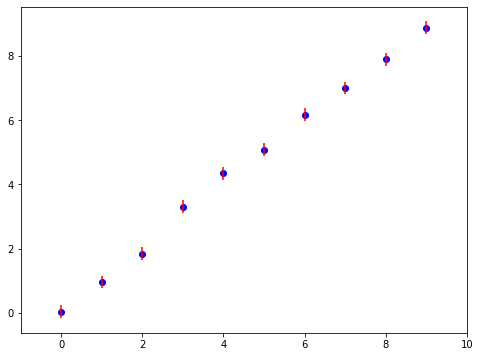

In [3]:
import scipy.optimize as fitter

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
sig = 0.2
Npoints = 10
xdata = np.arange(0,Npoints,1.)
ydata = a0+xdata*b0+sig*np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

Your model's parameters and their uncertainties are the following: 

a= 0.099+/-0.118 

b= 0.988+/-0.022 


Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: 

chi^2 =  6.67 

chi^2/d.f.= 0.83 



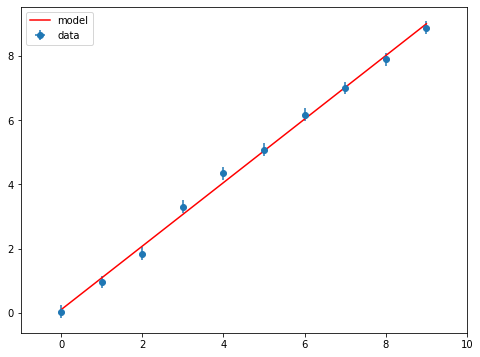

In [4]:
# Make sure you run the cell above this first to generate some artificial data
# to which we will fit this curve

#=============================================================================================
# Define a fit model. For this part, we will use a linear function
# The function which defines your model HAS TO TAKE ON A SPECIFIC FORM
#=============================================================================================

def model(x, a, b):
    return a + b*x

# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.5, -0.3]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

#=============================================================================================
# the par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
#=============================================================================================

print("Your model's parameters and their uncertainties are the following: \n")
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f} \n'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f} \n\n'.format(b,eb))

#=============================================================================================
# compute reduced chi2
#=============================================================================================

print("Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: \n")
chi_squared = np.sum(((ydata - model(xdata, *par))/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f} \n'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f} \n'.format(reduced_chi_squared))

#=============================================================================================
# overlay plot over data
#=============================================================================================

plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o', label='data') #plotting the data
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-', label='model') #plotting the model
plt.legend()
plt.show()

In summary:
1. for curve fitting you need to write a model function that you think the data should fit based on some unknown parameters
1. you need to make an array full of guesses for each unknown parameter
1. use `scipy.optimize.curve_fit` function to fit the model's paramters to best match the data
1. This function spits out two things, the parameters array which it's length depends on how many parameters your model needs. The second thing is the Covariance 2D array which the square root of the diagonals correspond to the uncertainties of each parameter
1. We now can plug these found parameters into our model and plot to see how well the model fits the data points


## Problem 1 (25 Points)

We now introduced a new function: `scipy.optimize.curve_fit()`. The code in the cell immediately below will generate some data where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to fit a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties as we did above.

Your x data values are stored as xdata
Your y data values are stored as ydata
Your y data uncertainties are stored as sigma


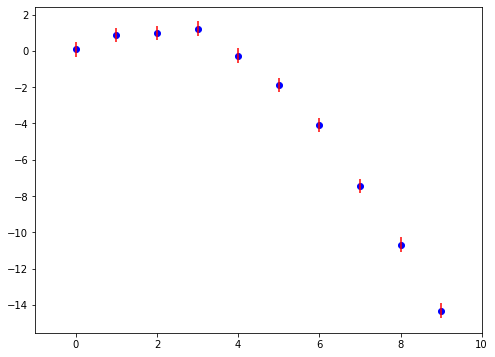

In [5]:
# Generate artificial data = quadratic function with a0 = .5, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

print("Your x data values are stored as xdata")
print("Your y data values are stored as ydata")
print("Your y data uncertainties are stored as sigma")

plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

**Write your solution for this problem in the cell below**

The model's parameters and their uncertainties are the following: 

a=-0.309+/-0.017 

b= 1.140+/-0.163 


c= 0.116+/-0.314 




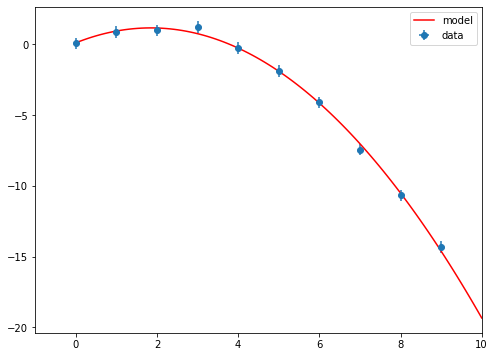

In [6]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def new_model(x,a,b,c):
    return a*x**2 + b*x + c

par0 = np.array([-.7, 1, 1])
par, cov = curve_fit(new_model, xdata, ydata, par0, sigma, absolute_sigma=True)


print("The model's parameters and their uncertainties are the following: \n")
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f} \n'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f} \n\n'.format(b,eb))
c = par[2]
ec = np.sqrt(cov[2,2])
print('c={0:6.3f}+/-{1:5.3f} \n\n'.format(c,ec))

plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o', label='data')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,10,100)
plt.plot(xfit,new_model(xfit,par[0],par[1],par[2]),'r-', label='model')
plt.legend()
plt.show()


# Root Finding

The following problem will be us exploring how to find the roots of a function numerically.

## Problem 2 (25 Points)

### [Adapted from Newman 6.15]

Consider a sixth-order polynomial 
$$P(x) = 924x^6 - 2772x^5 + 3150x^4 -1680x^3 +420x^2 -42x + 1$$
There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically. 
1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find rough values for the six roots of the polynomial. 
1. Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods dsicussed in class. (you can/should use the built-in functions). 

Hint: I would recommend using `fsolve` in the scipy library

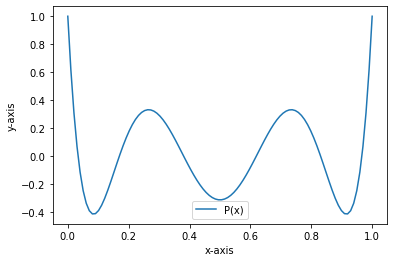

[0.61930959 0.16939531 0.96623476 0.83060469 0.38069041 0.96623476]


In [12]:
from scipy.optimize import fsolve
def P(x): 
    return 924*x**6 - 2772*x**5 + 3150*x**4 -1680*x**3 +420*x**2 -42*x + 1

x_data = np.linspace(0,1,100)
plt.plot(x_data,P(x_data) , label = 'P(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

##"""To find the roots, plot the graph and guess approximately what they are"""
roots = fsolve(P, [.6843, .2374, .99239, .7635, .29374, .937476377]) 
root1 = roots[0]
root2 = roots[1]
root3 = roots[2]
root4 = roots[3]
root5 = roots[4]
root6 = roots[5]

print(roots)

In [15]:
print("The 0th Root is {0:3.10f}".format(roots[0]))
print("The 1th Root is {0:3.10f}".format(roots[1]))
print("The 2nd Root is {0:3.10f}".format(roots[2]))
print("The 3rd Root is {0:3.10f}".format(roots[3]))
print("The 4th Root is {0:3.10f}".format(roots[4]))
print("The 5th Root is {0:3.10f}".format(roots[5]))


The 0th Root is 0.6193095934
The 1th Root is 0.1693953080
The 2nd Root is 0.9662347566
The 3rd Root is 0.8306046944
The 4th Root is 0.3806904109
The 5th Root is 0.9662347568


# Numerical Differentiation

SciPy offers a library function to compute derivatives. It uses a central difference formula, but with additional ability to use more than two points. Here is an example of its use, it is called `scipy.mis.derivative`. See full documentation at http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

In [4]:
from scipy.misc import derivative
import time

# Compute the derivative of cos(x) at x = pi
t0 = time.time()
dy_scipy_1 = derivative(func=np.cos, x0=np.pi, dx=1e-6, n=1, order=3)
t1 = time.time()
dy_scipy_2 = derivative(func=np.cos, x0=np.pi, dx=1e-6, n=1, order=101)
t2 = time.time()

dt1 = t1 - t0
dt2 = t2 - t1
print("Derivative using order = 3: %.5f, takes %.5f sec to compute using your computer" % (dy_scipy_1, dt1))
print("Derivative using order = 101: %.5f, takes %.5f sec to compute using your computer" % (dy_scipy_2, dt2))

Derivative using order = 3: 0.00000, takes 0.00017 sec to compute using your computer
Derivative using order = 101: 0.00000, takes 0.11635 sec to compute using your computer


The arguments here are as follows:

    func:  the name of the function whose derivative you want to calculate
    x0:    the location of the value (scalar) or values (numpy array) where you want to evaluate the derivative
    dx:    spacing between the points it generates (by evaluating `func`) to calculate the differences
    n:     the number of derivatives. `n=1` means first derivative of `func`
    order: number of points to use in the difference method. Must be odd.

## Problem 3 (25 Points)

1. Use the `scipy.misc.derivative()` function with `order=3` to estimate the derivative of the $cos(x)$ and compute the difference relative to the analytical result (what you would get doing it by hand), and plot this difference along with the difference you obtained for the centered estimates. Feel free to try changing some of the parameters like `dx` or `order` and see how they impact your result.

1. Try a different value of `n` (the number of derivatives). Plot your estimates of `n`-th derivative. Does it behave like you expect?

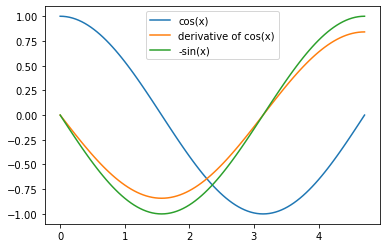

In [16]:
def f(x):
    return np.cos(x)


x_data = np.linspace(0,(3*np.pi)/2,100)
d_values = []
for i in x_data:
    first_derivative = derivative(f, i, dx=1, order = 3)
    d_values.append(first_derivative)

def analytical(x):
    return -np.sin(x)

plt.plot(x_data,f(x_data), label = ('cos(x)'))
plt.plot(x_data,d_values, label = ('derivative of cos(x)'))
plt.plot(x_data, analytical(x_data), label = ('-sin(x)'))
plt.legend()
plt.show()

# After trying multple methods; I feel that my function is 
# relatively similar to it's derivtaive, there's a small margin of error I will say.

# Numerical Integration

## Problem 4 (25 Points)

### Adapted from [Ayars 2.2] and Physics 77

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi}\sin x\, dx $$
1. $$\int_2^4 (x^2+x+1)\, dx$$

For both parts, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Part 2 is particularly interesting in this regard. In your submitted work, describe roughly how many points were required, and explain.

In [41]:
# The code below represents the trapezoid integration method, and the simpson method too
from scipy import integrate
def trapezoid(P,a,b,N=25):
    x = np.linspace(a,b,N+1)
    y = P(x)
    y_right = y[1:]
    y_left = y[:-1]
    dx = (b - a)/N
    I = (dx/2) * np.sum(y_right + y_left)
    return I

def simpson(F,a,b,N=50):
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = F(x)
    Int = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return Int

# The code below is meant to show what I'd do for the adaptive Gaussian quadrature method  
# G = lambda x: (some function)
# I would then use function integrate.quadrature from scipy



In [44]:
trapezoid(np.sin, 0, 2*np.pi, 900)
print (trapezoid(np.sin, 0, 2*np.pi, 900))

simpson(lambda x : np.sin(x), 0, 2*np.pi, 900)
print (simpson(lambda x : np.sin(x), 0, 2*np.pi, 900))

G = lambda x: np.sin(x)
integrate.quadrature(G, 0, 2*np.pi) 

-3.968419268845377e-16
0.0


(-3.487868498008632e-16, 1.118255127289579e-15)

In [48]:
trapezoid(lambda x: x**2+x+1, 2, 4, 900)
print (trapezoid(lambda x: x**2+x+1, 2, 4, 900))

simpson(lambda x: x**2+x+1, 2, 4, 900 )
print (simpson(lambda x: x**2+x+1, 2, 4, 900 ))

F = lambda x: x**2+x+1
integrate.quadrature(F, 2, 4)
print (integrate.quadrature(F, 2, 4))

26.666668312757206
26.666666666666664
(26.666666666666664, 0.0)


In [ ]:
# I used two points as I was unsure as to how include multiple points
# I feel that using 2 points could've had a positive impact in the sense
# that the integral could have been more specific 